# Pymaceuticals Inc.
---

### Analysis

-The tumor in mouse l509 decreased in size over time. This mouse was treated with capomulin.
-Capomulin and Ramicane had the most significant decreases in tumor size.
  Mice treated with Infubinol and Ceftamin had larger increases in tumor size.
 -There is a positive correlation between mouse weight and tumor size. The regression analysis establishes that there is a direct relationship between these two variables. The P-Value is .84 with an r-squared of .70. 
 


In [76]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_merge_df = mouse_metadata.merge(study_results,how ='inner', on= "Mouse ID")

# Display the data table for preview
mouse_merge_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [77]:
# Checking the number of mice.
len(mouse_merge_df['Mouse ID'].unique())

249

In [78]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mouse_id = mouse_merge_df.loc[mouse_merge_df.duplicated(subset=['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()
dup_mouse_id

array(['g989'], dtype=object)

In [79]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mouse_df = mouse_merge_df.loc[mouse_merge_df["Mouse ID"] == "g989"]
dup_mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [80]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = mouse_merge_df[mouse_merge_df['Mouse ID'].isin(dup_mouse_id)==False]
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [81]:
# Checking the number of mice in the clean DataFrame.
len(clean_df['Mouse ID'].unique())

248

## Summary Statistics

In [82]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).mean()
median = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).median()
var = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).var()
std = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).std()
sem = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).sem()

summary_stat = pd.DataFrame({"Mean Tumor Volume":mean, 
                            "Median Tumor Volume":median, 
                           "Tumor Volume Variance":var, 
                           "Tumor Volume Std. Dev.":std, 
                           "Tumor Volume Std. Err.":sem})


# Assemble the resulting series into a single summary table grouped by 'Drug Regimen'
summary_stat

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [83]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen


# Using the aggregation method, produce the same summary statistics in a single line.
agg_summary_df = clean_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].agg(['mean','median','var', 'std', 'sem'])
agg_summary_df


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, 'Number of Mice Tested')

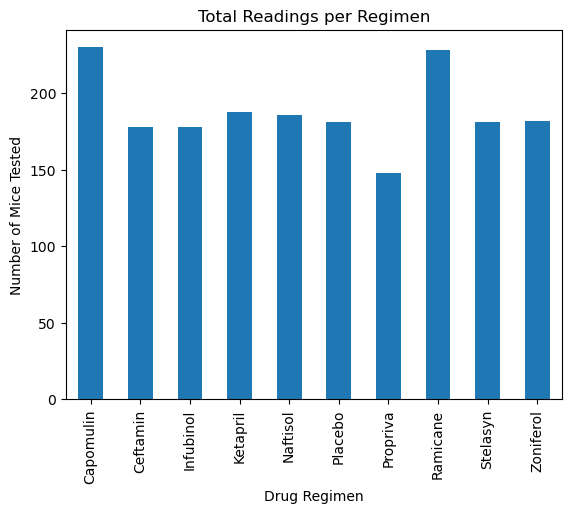

In [84]:
mouse_bar = clean_df.groupby(['Drug Regimen'])['Mouse ID'].count()

mouse_bar.plot.bar(title='Total Readings per Regimen', y='Mouse ID', x='Drug Regimen')

plt.ylabel('Number of Mice Tested')

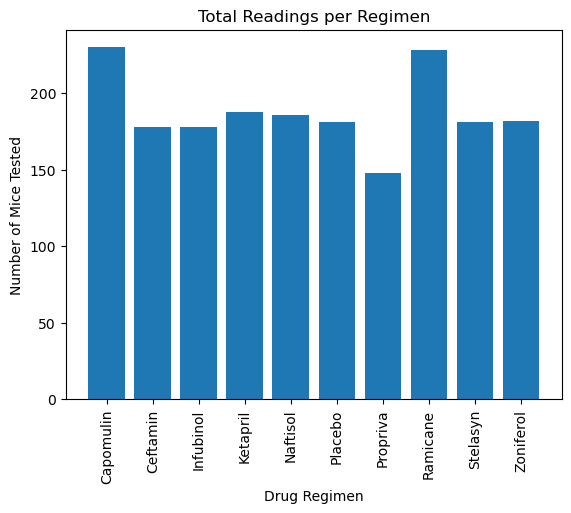

In [85]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis = mouse_bar.index.values
y_axis = mouse_bar.tolist()



mouse_chart = plt.bar(x_axis, y_axis)
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice Tested')
plt.title('Total Readings per Regimen')

plt.xticks(rotation=90)
plt.show()

<AxesSubplot:ylabel='Sex'>

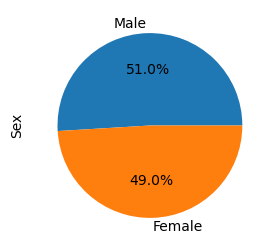

In [86]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
compare_sex = clean_df['Sex'].value_counts()

compare_sex.plot(kind='pie',y='', autopct='%1.1f%%', figsize=(3, 3))

<function matplotlib.pyplot.show(close=None, block=None)>

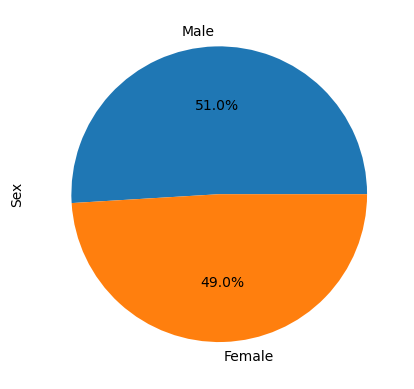

In [87]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = 'Male' , 'Female'
fig1, ax1 = plt.subplots()
ax1.pie(compare_sex,labels=labels, autopct='%1.1f%%')
plt.ylabel('Sex')
plt.show

## Quartiles, Outliers and Boxplots

In [88]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint_df = clean_df.groupby(['Mouse ID'])['Timepoint'].max().reset_index()


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
timepoint_df = last_timepoint_df.merge(clean_df,on=['Mouse ID','Timepoint'], how='left')
print(timepoint_df.head())

treatment_names = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

for name in range(len(treatment_names)):
    temp = timepoint_df[timepoint_df['Drug Regimen'] == treatment_names[name]]

  Mouse ID  Timepoint Drug Regimen     Sex  Age_months  Weight (g)  \
0     a203         45    Infubinol  Female          20          23   
1     a251         45    Infubinol  Female          21          25   
2     a262         45      Placebo  Female          17          29   
3     a275         45     Ceftamin  Female          20          28   
4     a366         30     Stelasyn  Female          16          29   

   Tumor Volume (mm3)  Metastatic Sites  
0           67.973419                 2  
1           65.525743                 1  
2           70.717621                 4  
3           62.999356                 3  
4           63.440686                 1  


In [89]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = {'Capomulin': [],
                  'Ramicane': [],
                   'Infubinol': [], 
                   'Ceftamin': []}


# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = {'Capomulin': [],
            'Ramicane': [],
            'Infubinol': [], 
            'Ceftamin': []}

for name in treatments:
    # Loop thru regiments highest timepoint data
    for i in timepoint_df.index:
        # Append the tumor volume to the list
        if timepoint_df.iloc[i]['Drug Regimen'] == name:
            tumor_vol_data[name].append(timepoint_df.iloc[i]['Tumor Volume (mm3)'])
            
# Create a new data frame 
tumor_df = pd.DataFrame(tumor_vol_data)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for name in treatment_names:
    # Add subset
    subset = timepoint_df[timepoint_df['Drug Regimen']== name]
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    quartiles = subset['Tumor Volume (mm3)'].quantile([0.25,0.5,0.75])
    first_quartile = quartiles[0.25]
    second_quartile = quartiles[0.5]
    third_quartile = quartiles[0.75]
    iqr = third_quartile - first_quartile
    # Bounds
    lower_bound = first_quartile - (1.5*iqr)
    upper_bound = third_quartile + (1.5 *iqr)
    
    # Determine outliers using upper and lower bounds
    outliers = timepoint_df.loc[(timepoint_df['Tumor Volume (mm3)'] <= lower_bound) | (timepoint_df['Tumor Volume (mm3)'] >= upper_bound)]
print(outliers)
    

    Mouse ID  Timepoint Drug Regimen     Sex  Age_months  Weight (g)  \
96      k403         45     Ramicane    Male          21          16   
174     s185         45    Capomulin  Female           3          17   

     Tumor Volume (mm3)  Metastatic Sites  
96            22.050126                 1  
174           23.343598                 1  


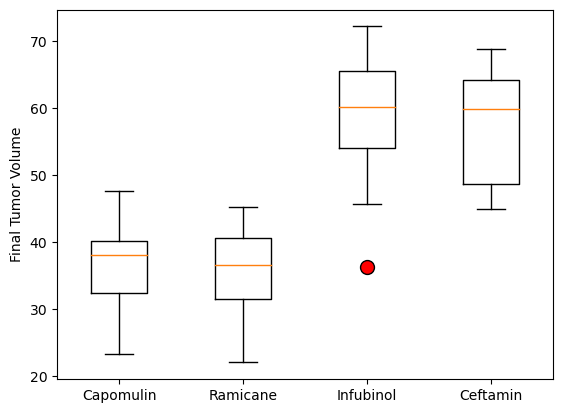

In [90]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

red_circle = dict(markerfacecolor='r', marker='o', ms=10)
plt.boxplot(tumor_df, labels = ["Capomulin","Ramicane","Infubinol","Ceftamin"], flierprops=red_circle)
plt.ylabel("Final Tumor Volume")
plt.show()

## Line and Scatter Plots

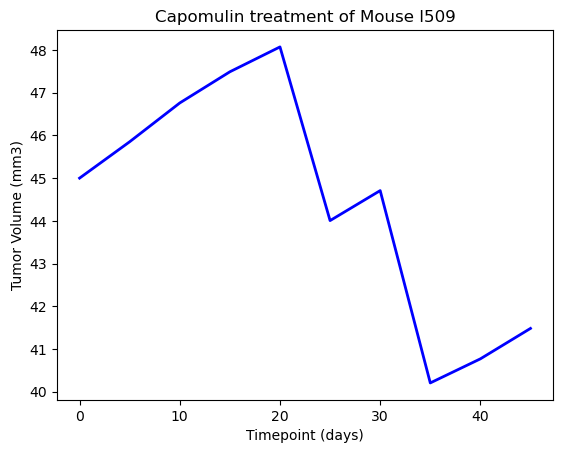

In [91]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin = mouse_merge_df.loc[mouse_merge_df["Drug Regimen"]== "Capomulin"]
Mouse_ID = capomulin.loc[capomulin["Mouse ID"] == 'l509']
Timepoint = Mouse_ID["Timepoint"]
Tumor_volume = Mouse_ID["Tumor Volume (mm3)"]
Mouse_l509 = plt.plot(Timepoint, Tumor_volume,color="blue", linewidth=2, label="Mouse ID:l509")

# Create labels for the X and Y axis
plt.title('Capomulin treatment of Mouse l509')
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")

plt.show()

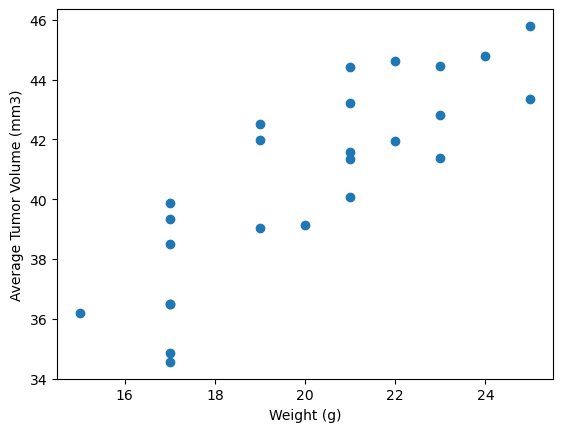

In [92]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

capavg = capomulin.groupby(['Mouse ID']).mean()

plt.scatter(capavg['Weight (g)'], capavg['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.show()



## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84
The r-squared is: 0.709


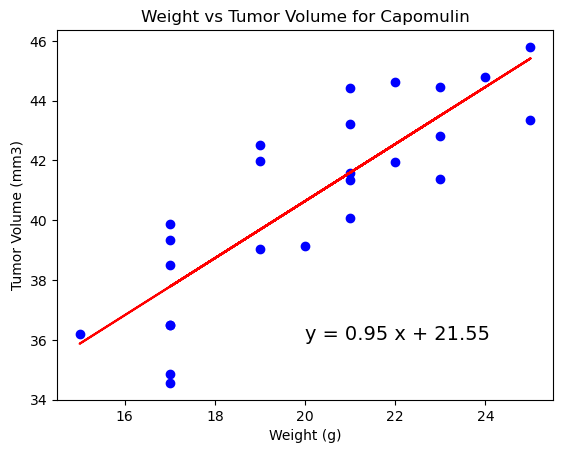

In [99]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(capavg['Weight (g)'],capavg['Tumor Volume (mm3)'])
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

(slope, intercept,rvalue, pvalue, stderr)= st.linregress(capavg["Weight (g)"],capavg["Tumor Volume (mm3)"])
regress_values=capavg["Weight (g)"]* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(capavg["Weight (g)"],capavg["Tumor Volume (mm3)"],color='b')
plt.plot(capavg["Weight (g)"], regress_values, color='red')
plt.annotate(line_eq,(20,36), fontsize=14)
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Weight vs Tumor Volume for Capomulin")
print(f"The r-squared is: {round(rvalue**2,3)}")
plt.show()
